In [9]:
#Perform bilinear interpolation on a image
import numpy as np
import matplotlib.pyplot as plt

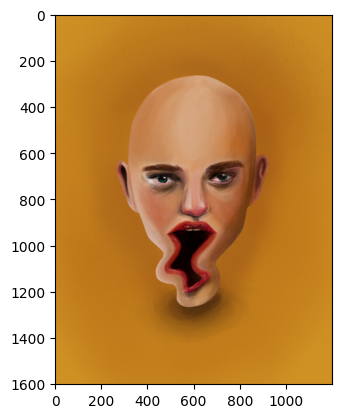

In [23]:
image = plt.imread("./distortedImage.jpg")
plt.imshow(image)

In [11]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [12]:
import cv2

In [21]:
def bilinear_interpolation(src, dst_size):
    src_height, src_width = src.shape[:2]
    dst_width, dst_height = dst_size
    
    # Check if the image is grayscale or color
    is_grayscale = len(src.shape) == 2

    # Create an empty image for the destination with the specified size
    if is_grayscale:
        dst = np.zeros((dst_height, dst_width), dtype=src.dtype)
    else:
        dst = np.zeros((dst_height, dst_width, src.shape[2]), dtype=src.dtype)

    # Calculate the ratio of old dimensions to new dimensions
    x_ratio = src_width / dst_width
    y_ratio = src_height / dst_height
    
    for i in range(dst_height):
        for j in range(dst_width):
            # Find the coordinates of the four nearest pixels
            x_l = int(x_ratio * j)
            y_l = int(y_ratio * i)
            x_h = min(x_l + 1, src_width - 1)
            y_h = min(y_l + 1, src_height - 1)
            
            # Distances between the point and the top-left corner
            x_weight = (x_ratio * j) - x_l
            y_weight = (y_ratio * i) - y_l
            
            # Interpolation process
            if is_grayscale:
                a = src[y_l, x_l]
                b = src[y_l, x_h]
                c = src[y_h, x_l]
                d = src[y_h, x_h]
                
                # Calculate the weighted sum of pixels
                pixel_value = (a * (1 - x_weight) * (1 - y_weight) +
                               b * x_weight * (1 - y_weight) +
                               c * (1 - x_weight) * y_weight +
                               d * x_weight * y_weight)
                
                dst[i, j] = int(pixel_value)
            else:
                for channel in range(src.shape[2]):
                    a = src[y_l, x_l, channel]
                    b = src[y_l, x_h, channel]
                    c = src[y_h, x_l, channel]
                    d = src[y_h, x_h, channel]
                    
                    # Calculate the weighted sum of pixels
                    pixel_value = (a * (1 - x_weight) * (1 - y_weight) +
                                   b * x_weight * (1 - y_weight) +
                                   c * (1 - x_weight) * y_weight +
                                   d * x_weight * y_weight)
                    
                    dst[i, j, channel] = int(pixel_value)
    
    return dst

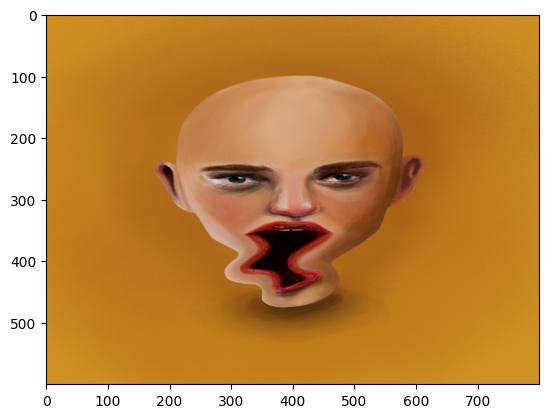

In [22]:
clean_image = bilinear_interpolation(image, (800,600))
plt.imshow(clean_image)